# 导入需要的库

In [4]:
import pandana, matplotlib.pyplot as plt
from pandana.loaders import osm
%matplotlib inline
import pandas as pd
import pandana as pdna
import numpy as np

In [2]:
import transbigdata as tbd
import pandas as pd

In [3]:
taxidata = pd.read_csv('/mnt/c/Users/DELL/Desktop/TaxiData-Sample.csv',header=None)
taxidata.columns = ['ID', 'Time', 'Lng', 'Lat', 'OpenStatus', 'Speed']

In [38]:
taxidata

,ID,Time,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19
...,...,...,...,...,...,...
1048571,34042,8:28:28,114.049118,22.541067,1,11
1048572,34042,8:28:38,114.049118,22.541067,1,0
1048573,34042,5:46:20,114.049515,22.525749,1,31
1048574,34042,6:27:46,114.049583,22.525633,0,32


In [40]:
tbd.visualization_trip(taxidata)

Processing trajectory data...
Generate visualization...
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'hizm36i', 'type': …

In [41]:
data = pd.read_csv('/mnt/c/Users/DELL/Desktop/TaxiData-Sample.csv',header=None)
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']

In [43]:
tbd.visualization_data(data,col=['Lng','Lat'],accuracy=1000,height=500)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

# world map

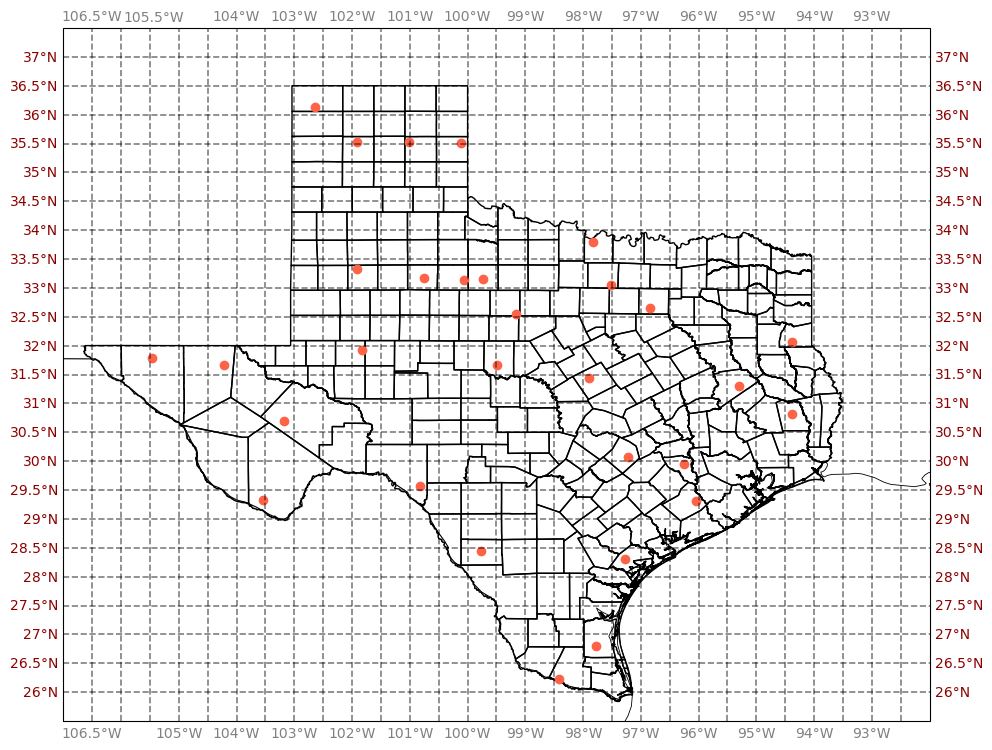

In [15]:
# shp_path = '/mnt/e/Research_life/ArcGIS/world_map_countries_shp/world_map_countries_shp/countries.shp'
shp_path = '/mnt/e/Research_life/ArcGIS/USA/USA-texas/Texas_County_Boundaries_Detailed/County.shp'
loc = pd.read_excel('/mnt/c/Users/DELL/Desktop/wrr_site_loc.xlsx').dropna(how='any')


# lon = np.arange(-180,180,0.05)
# lat = np.arange(90,-90,-0.05)
#%%
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
proj = ccrs.PlateCarree()
# proj = ccrs.Mercator()
fig = plt.figure(figsize = (16,9))
ax = fig.subplots(1,1,subplot_kw = {'projection':proj})
ax.add_feature(cfeat.BORDERS.with_scale('50m'), linewidth=0.8, zorder=1)
ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=0.6, zorder=1)
# ax.add_feature(cfeat.RIVERS.with_scale('50m'), zorder=1)
# ax.add_feature(cfeat.LAKES.with_scale('50m'), zorder=1)
ax.set_extent([-107, -92, 25.5, 37.5],crs=proj)# 设置范围 

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
linewidth=1.2, color='k', alpha=0.5, linestyle='--')
# gl.xlabels_top = False #关闭顶端标签
# gl.ylabels_right = False #关闭右侧标签
gl.xformatter = LONGITUDE_FORMATTER #x轴设为经度格式
gl.yformatter = LATITUDE_FORMATTER #y轴设为纬度格式
gl.xlocator=mticker.FixedLocator(np.arange(-110,-90,0.5))      
gl.ylocator=mticker.FixedLocator(np.arange(22,40,0.5)) 
# gl.xlines = True  # 关闭x网格
# gl.ylines = True  # 关闭y网格

# gl.xlabel_style = {'size': 14, 'color': 'gray','weight':'normal'}   # 修改主图x坐标字体特征
# gl.ylabel_style = {'size': 14, 'color': 'red', 'weight': 'bold'}   # 修改主图y坐标字体特征
gl.xlabel_style = {'size': 10, 'color': 'gray', 'weight': 'normal'}   # 修改主图x坐标字体特征
gl.ylabel_style = {'size': 10, 'color': 'darkred', 'weight': 'normal'}   # 修改主图y坐标字体特征

# 设置colorbar
# cbar_kwargs = {
# 'orientation': 'horizontal', # cb放在图下面
# 'label': 'Percentage',
# 'shrink': 0.8,
# }


# levels = np.arange(0,1.05,0.15)
# 画图
mapp = shpreader.Reader(shp_path).geometries()
ax.add_geometries(mapp, proj,facecolor='none', edgecolor='black',zorder = 1)
# # 颜色映射，以0为分界线
ax.plot(loc['LON'],loc['LAT'],'o', color='tomato',label='MGEX', transform=proj)
# a = ax.contourf(lon,lat,data,cmap=cmaps.BlueYellowRed, transform=ccrs.PlateCarree())
# cb = fig.colorbar(
    
#         a, ax=ax, shrink=0.67, pad=0.08, orientation='horizontal'
        
#     )

# cb.ax.tick_params(labelsize=14)  #设置色标刻度字体大小。

# font = {'family' : 'serif',
#         'color'  : 'darkred',
#         'weight' : 'normal',
#         'size'   : 16,
#         }
# cb.set_label('colorbar',fontdict=font) #设置colorbar的标签字体及其大小
# # plt.title('CHINA is the best country in the world',fontsize=22)
